# **Bike Rental Demand Prediction**

### **Objective:** 
- To predict the demand of bikes at any given hours of the day, so that, the bike rental company can plan accordingly and avoid any shortage or surplus of bikes.

### **Dataset:** 
- The dataset is provided by the Bike Rental company, where the dataset provides hourly rental data for last two years.

#### The flow of the case study is as below:

- Reading the data in python
- Defining the problem statement
- Identifying the Target variable
- Looking at the distribution of Target variable
- Basic Data exploration
- Rejecting useless columns
- Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
- Feature Selection based on data distribution
- Outlier treatment
- Missing Values treatment
- Visual correlation analysis
- Statistical correlation analysis (Feature Selection)
- Converting data to numeric for ML
- Sampling and K-fold cross validation
- Trying multiple Regression algorithms
- Selecting the best Model
- Deploying the best model in production

### **Dataset:**
- The file contains data for **17,379** rental bikes.


### **The business meaning of each column in the data is as below**

- **season**: The current season (1:winter, 2:spring, 3:summer, 4:fall)
- **yr**: year (0: 2011, 1:2012)
- **mnth**: month ( 1 to 12)
- **hr**: hour of the day (0 to 23)
- **holiday**: weather day is holiday or not
- **weekday**: day of the week
- **workingday**: if day is neither weekend nor holiday is 1, otherwise is 0
- **weathersit**: The Weather forecast for the day
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp**: Normalized temperature in Celsius.
- **atemp**: Normalized feeling temperature in Celsius.
- **hum**: Normalized humidity. The values are divided to 100 (max)
- **windspeed**: Normalized wind speed. The values are divided to 67 (max)
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
BikeRentalData=pd.read_csv('../Datasets/BikeRentalData.csv', encoding='latin')
print('Shape before deleting duplicate values:', BikeRentalData.shape)

# Removing duplicate rows if any
BikeRentalData=BikeRentalData.drop_duplicates()
print('Shape After deleting duplicate values:', BikeRentalData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
BikeRentalData.head(10)

Shape before deleting duplicate values: (17379, 14)
Shape After deleting duplicate values: (17377, 14)


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1,1
5,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1,1
6,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,0,2
7,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,2,3
8,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,7,8
9,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,6,14


### **Defining the problem statement**:
To create a ML model which can predict the number of bikes which will be rented at a given hour of the day:
- **Target Variable**: cnt
- **Predictors**: holiday, weather, registered users etc.

### **Determining the type of Machine Learning**:
Based on the problem statement, we need to create a **supervised ML Regression model**, as the target variable is Continuous.


### **Observation from the distribution of Target Variable**:

- If the target variable's distribution is too skewed, then the predictive model will not be possible.
- Bell curve is desirable while slight positive or negative skewness is also fine.
- When performing Regression, making sure histograms looks like a bell curve or slightly skewed version of it is important.
    - Otherwise it impacts the Machine Learning Algorithms ability to learn all the scenarios.

In [3]:
BikeRentalData.nunique()

season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      4
temp           50
atemp          65
hum            89
windspeed      30
registered    776
cnt           869
dtype: int64

<Axes: >

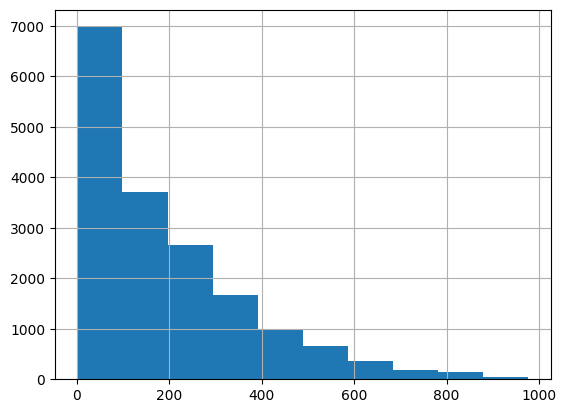

In [4]:
## Creating Bar Chart as the Target Variable is Continuous
%matplotlib inline
BikeRentalData['cnt'].hist()

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

### **Basic Data Exploration**
- Step to:
    - Gauge the overall data
    - Volume of the data
    - Types of columns in the data

- Initial assessment of the data being done to identify which columns are Quantitative, Categorical or Qualitative.

- Checking how each column would affect the values of the Target Variable.
    - If the column affects the final answer then remove the column.

In [5]:
BikeRentalData.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


- Observing the summarized information of the data
- Data types, Missing values based on the number of null values Vs total rows, etc.
- Remove those variables from data which have too many missing values (Missing Values > 30%)
- Remove Qualitative variables which cannot be used in Machine Learning

In [6]:
BikeRentalData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17377 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17377 non-null  int64  
 1   yr          17377 non-null  int64  
 2   mnth        17377 non-null  int64  
 3   hr          17377 non-null  int64  
 4   holiday     17377 non-null  int64  
 5   weekday     17377 non-null  int64  
 6   workingday  17377 non-null  int64  
 7   weathersit  17377 non-null  int64  
 8   temp        17377 non-null  float64
 9   atemp       17377 non-null  float64
 10  hum         17377 non-null  float64
 11  windspeed   17377 non-null  float64
 12  registered  17377 non-null  int64  
 13  cnt         17377 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 2.0 MB


In [7]:
# Looking at the descriptive statistics of the data
BikeRentalData.describe(include='all')

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
count,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000
mean,2.501525,0.502561,6.537435,11.547505,0.028774,3.003568,0.682742,1.425332,0.496993,0.475780,0.627216,0.190108,153.803649,189.483916
std,1.106917,0.500008,3.438722,6.914438,0.167175,2.005744,0.465422,0.639377,0.192553,0.171849,0.192935,0.122343,151.357913,181.387645
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,886.000000,977.000000


- Finding unique values for each column
- To understand which column is **Categorical** and which column is **Continuous**
- If number of unique values,
    - < 20 -> Category
    - else continuous

In [8]:
BikeRentalData.nunique()

season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      4
temp           50
atemp          65
hum            89
windspeed      30
registered    776
cnt           869
dtype: int64

### **Basic Data Exploration Results**

- **season**: Categorical. Selected.
- **yr**: Qualitative. Rejected. The year value is like an ID just for reference.
- **mnth**: Categorical. Selected.
- **hr**: Categorical. Selected.
- **holiday**: Categorical. Selected.
- **weekday**: Categorical. Selected.
- **workingday**: Categorical. Selected.
- **weathersit**: Categorical. Selected.
- **temp**: Continuous. Selected.
- **atemp**: Continuous. Selected.
- **hum**: Continuous. Selected.
- **windspeed**: Continuous. Selected.
- **casual**: Continuous. Selected.
- **registered**: Continuous. Selected.
- **cnt**: Continuous. Selected.This is the **Target Variable**!

### **Removing useless columns from the data**

Deleting those columns which are not useful in predictive analysis because these variables are qualitative

In [9]:
UselessColumns=['yr']
BikeRentalData=BikeRentalData.drop(UselessColumns, axis=1)
BikeRentalData.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


In [10]:
BikeRentalData.columns

Index(['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'registered', 'cnt'],
      dtype='object')

### **Visual Exploratory Data Analysis**
- Categorical variables: Bar plot
- Continuous variables: Histogram


### **Visualize distribution of all the Categorical Predictor variables in the data using bar plots**:

- Categorical variable in the data can be spotted by looking at the unique values in them.
- A categorical variable contains less than 20 unique values and there is repetition of values, thus data can be grouped by those unique values.

**Categorical Predictors**: 'season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'

In [11]:
# Defining function to plot multiple bar charts at once for Categorical Variables

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))

    fig.suptitle('Bar charts of: ' + str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar', ax=subPlot[plotNumber])

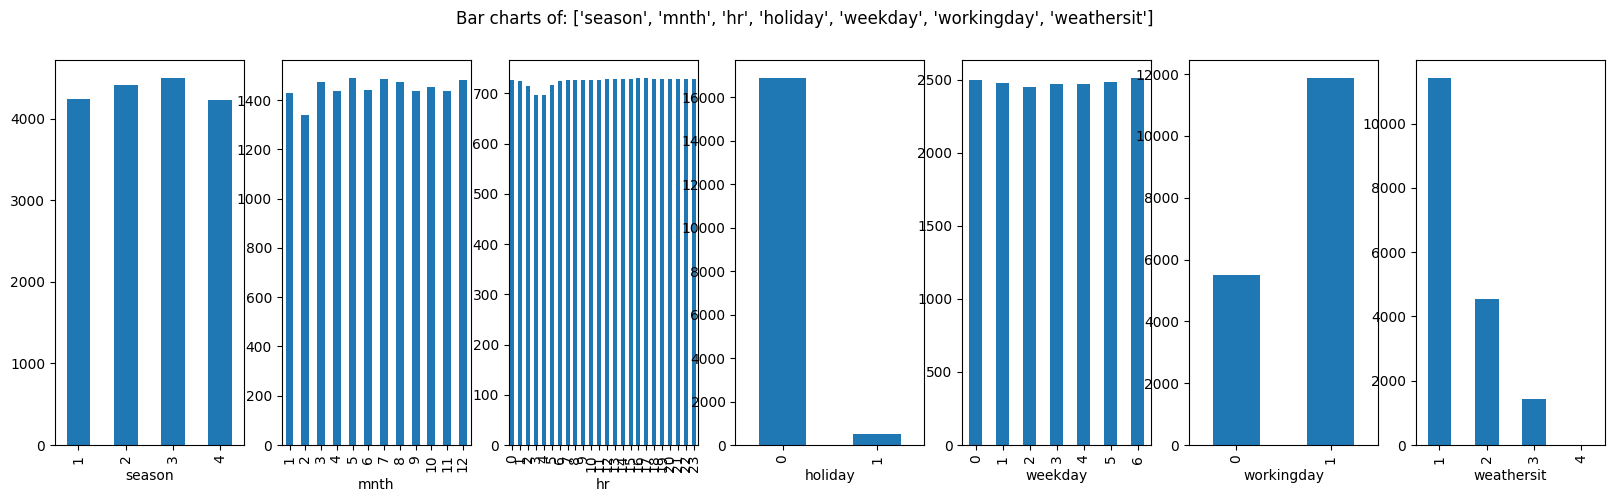

In [12]:
PlotBarCharts(inpData=BikeRentalData, colsToPlot=['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'])

### **Bar Charts Interpretation**

- The bar charts represent the frequencies of each category in the Y-axis and the category name in the X-axis.
- In ideal bar chart, each category has complete frequency. Hence, there are enough rows for each category in the data for the ML algorithms to learn from.
- If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present with very low frequency, it may indicate that the data is not suitable for the ML model to learn.
    - Correlation analysis section can be used here and a final call can be taken to select or reject the column.
- 'holiday' column in data is skewed, as here just one bar which is dominating and other categories have very less rows.
    - Such columns may not be correlated with the target variable but logically it can be a factor in explaining demand on a particular day.

### **Selected Categorical Variables**: 
('season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit')

### **Visualize distribution of all the Continuous Predictor variables in the data using histograms**
There are five continuous predictor variables:

('temp', 'atemp', 'hum', 'windspeed', 'registered')

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'registered'}>, <Axes: >]], dtype=object)

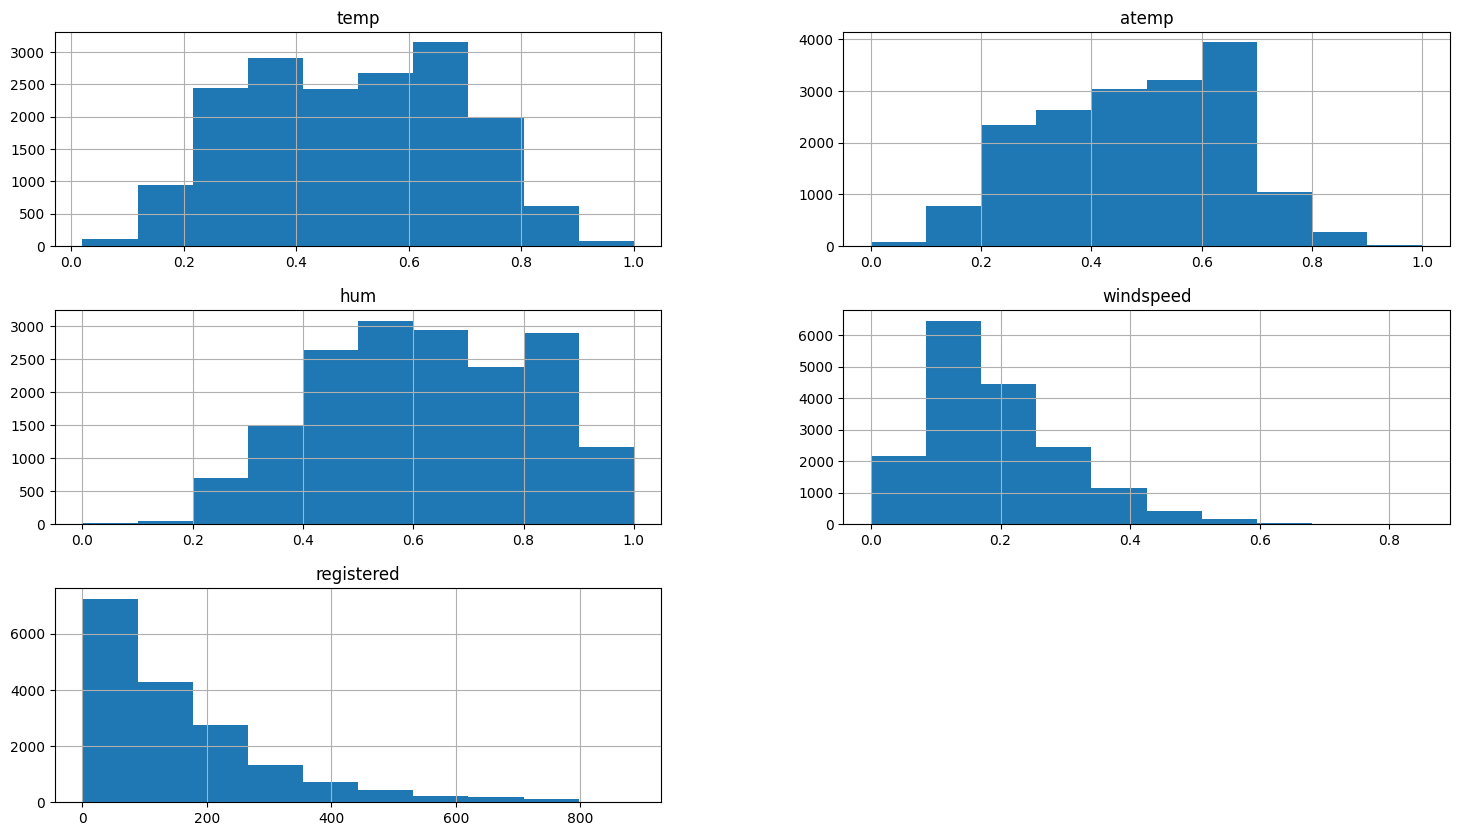

In [13]:
# Plotting histograms of multiple columns together
BikeRentalData.hist(['temp','atemp','hum','windspeed','registered'], figsize=(18,10))

### **Histogram Interpretation**:

- Histogram shows the distribution for a single continuous variable.
- The X-axis shows the range of values and Y-axis represent the number of values in that range.
- In the above histogram of "atemp", there are around 4K rows in that data having values between 0.6 and 0.7.
- The ideal outcome for histogram is a bell curve or slightly skewed curve.
- If there is too much skewness, then outlier treatment should be donea dn that column should be re-examined, or simply reject the column if it is not useful.

### **Selected Continuous Variables**: 
- **temp**: Selected. The distribution is good.
- **atemp**: Selected. The distribution is good.
- **hum**: Selected. The distribution is good.
- **windspeed**: Selected. The distribution is good.
- **registered**: Selected. The distribution is good.

### **Outlier Treatment**

- Outliers are extreme values in the data which are significantly different from the rest of the data points and can be seen as the tails in the histogram.

- Outlier must be treated one column at a time, as the treatments is slightly different for each column.

#### **Why to remove the outliers**

- Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

- Options to treat outlier in the data:
    - 1. Delete the outlier record, only if there are just few rows lost.
    - 2. Impute the outlier values with a logical business value.

#### **Missing values treatment**
- Missing values are treated for each column separately.

- If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.


There are below options for treating missing values in data.

- Delete the missing value rows if there are only few records
- Impute the missing values with MEDIAN value for continuous variables
- Impute the missing values with MODE value for categorical variables
- Interpolate the values based on nearby values
- Interpolate the values based on business logic

In [14]:
# Finding how many missing values are there for each column
BikeRentalData.isnull().sum()

season        0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
registered    0
cnt           0
dtype: int64

### **Feature Selection**
- Choosing the best columns(Features) which are correlated to the Target variable. 
- This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

#### **Visual exploration of relationship between variables**
- Continuous Vs Continuous ---- Scatter Plot
- Categorical Vs Continuous---- Box Plot
- Categorical Vs Categorical---- Grouped Bar Plots

#### **Statistical measurement of relationship strength between variables**
- Continuous Vs Continuous ---- Correlation matrix
- Categorical Vs Continuous---- ANOVA test
- Categorical Vs Categorical--- Chi-Square test


Target variable is Continuous, hence below two scenarios
- Continuous Target Variable Vs Continuous Predictor
- Continuous Target Variable Vs Categorical Predictor

### **Relationship exploration: Continuous Vs Continuous -- Scatter Charts**
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

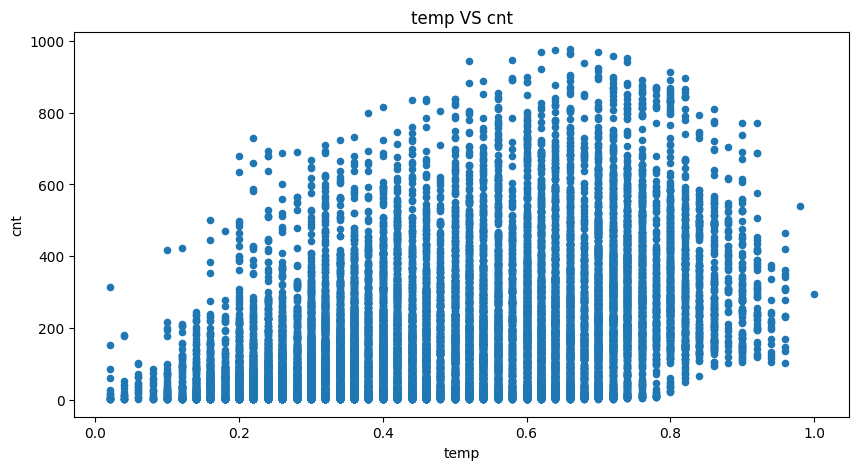

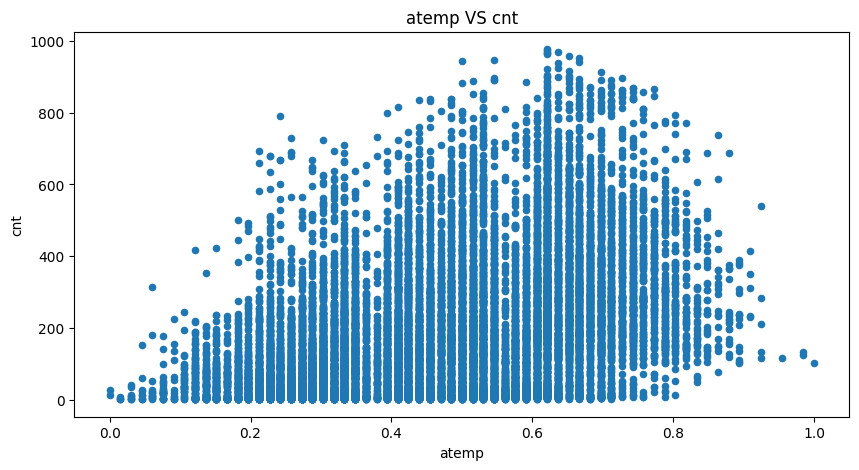

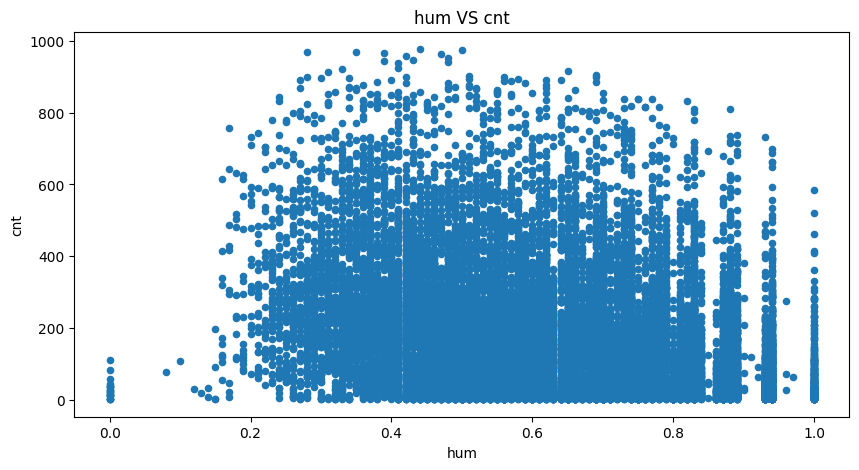

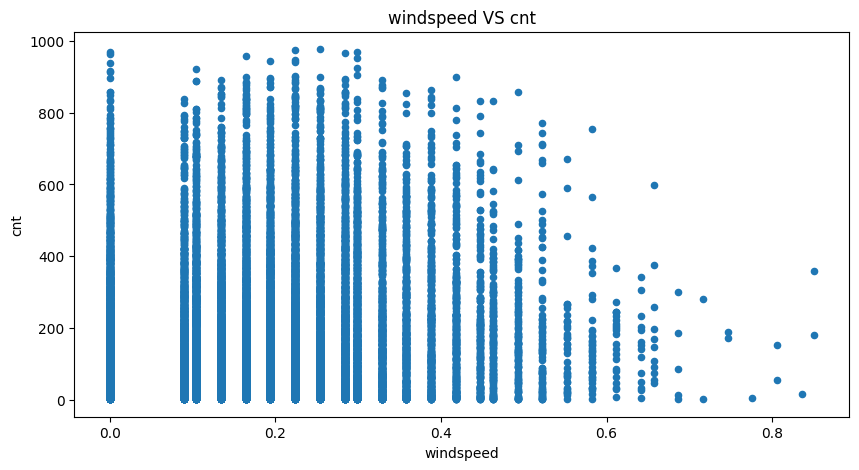

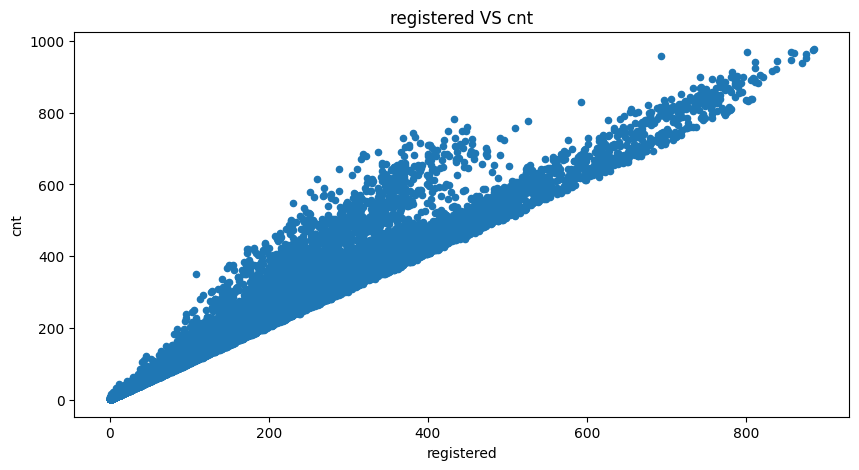

In [15]:
ContinuousCols=['temp','atemp','hum','windspeed','registered']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    BikeRentalData.plot.scatter(x=predictor, y='cnt', figsize=(10,5), title=predictor+" VS "+ 'cnt')

### **Scatter charts interpretation**
There could be three scenarios

1. **Increasing Trend**: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML!

2. **Decreasing Trend**: This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!

3. **No Trend**: You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

### **Statistical Feature Selection (Continuous Vs Continuous) using Correlation value**
Pearson's correlation coefficient can simply be calculated as the covariance between two features  `x` and  `y` (numerator) divided by the product of their standard deviations (denominator):

<html>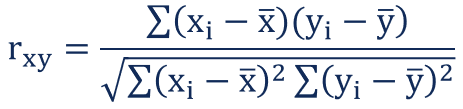</html>

- This value can be calculated only between two numeric columns
- Correlation between:
    - [-1,0) means inversely proportional -> the scatter plot will show a downward trend
    - (0,1] means directly proportional -> the scatter plot will show a upward trend
    - near {0} means No relationship, the scatter plot will show no clear trend.
    - If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
-We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question